In [70]:
import numpy as np
import pandas as pd

import requests as req
from bs4 import BeautifulSoup as bs

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# (복습)영화랭킹 페이지에서 영화제목, 평점 수집

In [143]:
url_main = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20200806'

res = req.get(url_main)

# day.strftime("%Y%m%d")
#파서 종류 : lxml, html.parser, html5lib
soup = bs(res.text, 'html.parser') 

AttributeError: 'str' object has no attribute 'strftime'

In [140]:
name = soup.select('div.tit5 > a')
rate = soup.find_all('td',class_='point')

print(name[0].text)
print(rate[0].text)

가버나움
9.59


In [67]:
len(name),len(rate)

(50, 50)

In [63]:
#방법1
#순위, 영화제목, 평점 수집
rank_list = []
name_list = []
rating_list = []

for index in range(len(name)):
    rank = index+1 # index가 0일 경우 1로 반환, 순위로 사용
    rank_list.append(rank)
    name_list.append(name[index].text)
    rating_list.append(rate[index].text)

In [62]:
#방법2
#순위, 영화제목, 평점 수집
rank_list = []
name_list = []
rating_list = []

for index, n, r in zip(range(1, len(name)+1),name ,rate):
    rank_list.append(index)
    name_list.append(n.text)
    rating_list.append(r.text)

In [61]:
#순위, 영화제목, 평점을 DataFrame으로 표현
movie_info = {'순위':rank_list, '영화명':name_list, '평점':rating_list}
movie = pd.DataFrame(movie_info)
movie.set_index("순위", inplace=True)
movie.head()
# movie

,영화명,평점
순위,,
1,그린 북,9.61
2,원더,9.45
3,알라딘,9.45
4,어벤져스: 엔드게임,9.39
5,교회오빠,9.30


In [60]:
#naver_movie_info.csv로 저장
movie.to_csv('naver_movie_info.csv', encoding='euc-kr')

In [59]:
#naver_movie_info.csv로 읽어오기
movie_chart = pd.read_csv('naver_movie_info.csv', encoding='euc-kr')

movie_chart.head()

,순위,영화명,평점
0,1,그린 북,9.61
1,2,원더,9.45
2,3,알라딘,9.45
3,4,어벤져스: 엔드게임,9.39
4,5,교회오빠,9.30


# Pandas를 활용한 날짜 생성

In [58]:
"""시작 날짜, 끝나는 날짜"""


date = pd.date_range('2020-08-01', '2020-08-06', freq='d')
#date = pd.date_range('2018-09-20', periods=100, freq='d')#페리오즈
date
#URL의 쿼리스트링으로 사용할 날짜 형식: 20200806

DatetimeIndex(['2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04',
               '2020-08-05', '2020-08-06'],
              dtype='datetime64[ns]', freq='D')

In [21]:
"""URL에 맞게 날짜 형식변환 : strftime("%Y%m%d)"""
day_list = [] #각각의 날짜를 인덱스마다 저장
for day in date:
    """print(day.strftime('%Y%m%d'))"""
    day_list.append(day.strftime('%Y%m%d')) #소문자y는 20이라고 나옴

In [22]:
day_list[:6]

['20200801', '20200802', '20200803', '20200804', '20200805', '20200806']

# 날짜별 영화 평점 수집

In [71]:
#얼만큼 진행되고있는지 알려주기
#!pip install tqdm
from tqdm import tqdm_notebook

In [83]:
movie_date = []
movie_name = []
movie_rate = []

#for day in day_list:

for day in tqdm_notebook(day_list):
    #영화페이지 접근
    url_sub = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date="+day
    res = req.get(url_sub)
    soup = bs(res.text, 'html.parser')
    
    #영화제목으로 길이 구하기
    #length = soup.select('div.tit5 > a')
    
    #제목, 평점 구하기
    name = soup.select('div.tit5 > a')
    rate = soup.find_all('td',class_='point')
    
    #잘가지고오는지 확인
    #print(len(name),name[0].text,rate[0].text)
    
    for n,r in zip(name, rate):
        movie_date.append(day)
        movie_name.append(n.text)
        movie_rate.append(r.text)


<ipython-input-83-6a0b846783cc>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for day in tqdm_notebook(day_list):


In [111]:
movie_dic = {'날짜':movie_date, 
             '영화명':movie_name, 
             '평점':movie_rate}
movie_df = pd.DataFrame(movie_dic)
#movie_df.set_index("날짜", inplace=True)
movie_df.head(10)

,날짜,영화명,평점
0,20200801,가버나움,9.59
1,20200801,위대한 쇼맨,9.40
2,20200801,알라딘,9.38
3,20200801,소년시절의 너,9.35
4,20200801,에이리언 2,9.35
5,20200801,다크 나이트,9.34
6,20200801,시네마 천국,9.31
7,20200801,패왕별희 디 오리지널,9.31
8,20200801,우리들,9.25
9,20200801,피아니스트의 전설,9.25


In [112]:
movie_df.to_csv('naver_movie_info.csv',encoding='euc-kr')

In [113]:
movie_df2 = pd.read_csv('naver_movie_info.csv',
                        index_col=0,
                        parse_dates=['날짜'],
                        encoding='euc-kr')
movie_df2.shape

(300, 3)

In [114]:
movie_df2.head()

,날짜,영화명,평점
0,2020-08-01,가버나움,9.59
1,2020-08-01,위대한 쇼맨,9.40
2,2020-08-01,알라딘,9.38
3,2020-08-01,소년시절의 너,9.35
4,2020-08-01,에이리언 2,9.35


# 영화 평점 변화 시각화하기 전 시각화연습

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

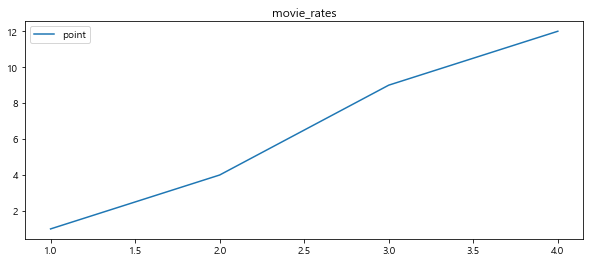

In [117]:
"""시각화 연습"""
x = [1,2,3,4]
y = [1,4,9,12]

plt.figure(figsize=(10,4)) # 그래프 객체 생성
plt.title('movie_rates')         # 그래프 제목
plt.plot(x,y,label='point') # x축,y축 데이터표시
plt.legend() #범례표시

# 영화 평점 변화 시각화하기

## 평균 평점이 높은 영화만 보여주기

In [118]:
"""많은 영화 제목이 있으니 이중에서 평점 평균이 높은것만 추리기"""
movie_df2["영화명"].unique()

array(['가버나움', '위대한 쇼맨', '알라딘', '소년시절의 너', '에이리언 2', '다크 나이트', '시네마 천국',
       '패왕별희 디 오리지널', '우리들', '피아니스트의 전설', '톰보이', '스타 이즈 본', '샤인',
       '타오르는 여인의 초상', '미스비헤이비어', '미져리', '안녕, 나의 소울메이트', '온워드: 단 하루의 기적',
       '미션', '시티 오브 갓', '미녀와 야수', '소공녀', '벌새', '카사블랑카', '베스트 오퍼',
       '카메라를 멈추면 안 돼!', '트로이', '라라랜드', '플라이', '찬실이는 복도 많지', '내일을 위한 시간',
       '헤이트풀8', '캐리', '울프 콜', '소리꾼', '다가오는 것들', '카페 벨에포크',
       '밤쉘: 세상을 바꾼 폭탄선언', '원 데이', '로마 위드 러브', '클라우즈 오브 실스마리아', '몽상가들',
       '야구소녀', '존 윅', '아들', '결백', '호우시절', '조디악', '유령선', '반도',
       '바람과 함께 사라지다', '레이니 데이 인 뉴욕', '에이리언', '박하사탕', '여배우는 오늘도', '아멜리에',
       '매치 포인트', '도둑들', '인셉션', '윤희에게', '다만 악에서 구하소서'], dtype=object)

### 평점 평균이 높은 영화 추출하기

In [119]:
name_ranking = []
for name in movie_df2["영화명"].unique():
    #print("{} : {}".format(name, movie_df2[movie_df2["영화명"]==name].mean()))
    #[영화명, 영화평점] 을 한세트로 리스트로 만듬 -> 정렬 하면 높은 평점의 영화명 가지고 올 수 있다.
    name_ranking.append([name,
                         movie_df2[movie_df2["영화명"]==name]["평점"].mean()])

In [120]:
name_ranking_df = pd.DataFrame(name_ranking, columns=["영화명","평균평점"])

In [121]:
name_ranking_df.sort_values(by="평균평점",
                            ascending=False,
                            inplace=True)
"""인덱스 재설정 후 원래 인덱스 삭제"""
name_ranking_df.reset_index(drop=True, inplace=True)

In [129]:
"""가장 잘 나온 10개의 영화명 추출"""
name_ranking_list = name_ranking_df[:10]["영화명"].values
name_ranking_list

array(['가버나움', '위대한 쇼맨', '알라딘', '소년시절의 너', '에이리언 2', '다크 나이트', '시네마 천국',
       '패왕별희 디 오리지널', '우리들', '피아니스트의 전설'], dtype=object)

## 그래프 그리기

In [130]:
#한글 깨짐 방지
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

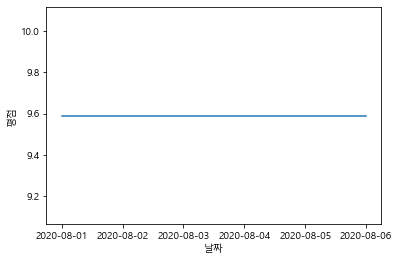

In [131]:
"""하나의 영화 그려보기"""
df = movie_df2[movie_df2["영화명"]==name_ranking_list[0]]
sns.lineplot("날짜","평점",data=df)

In [133]:
"""seaborn으로 그리기 위해 특정 영화만 데이터프레임으로 합치기"""
concat_df = pd.DataFrame()
for name in name_ranking_list[:3]:
    df = movie_df2[movie_df2["영화명"]==name]
    concat_df = pd.concat([concat_df,df], axis=0)

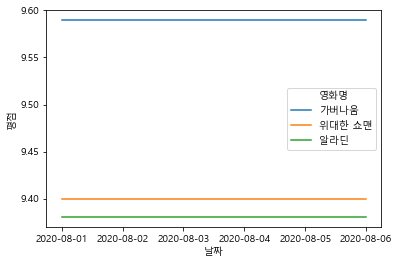

In [137]:
sns.lineplot("날짜","평점",data=concat_df, hue="영화명")

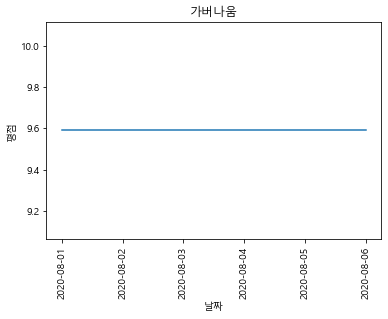

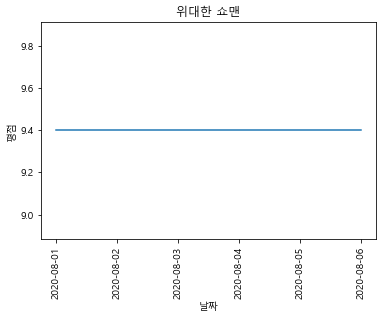

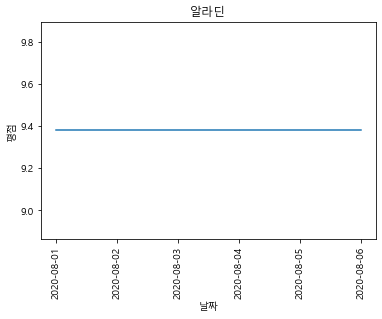

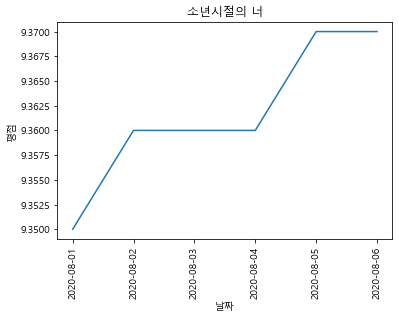

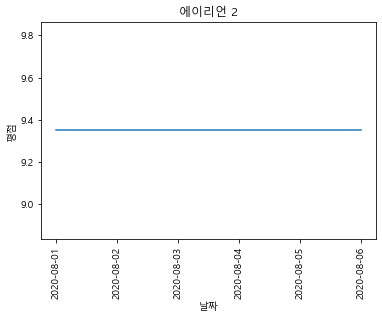

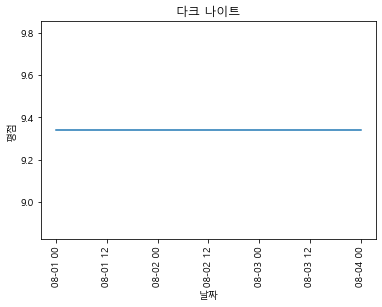

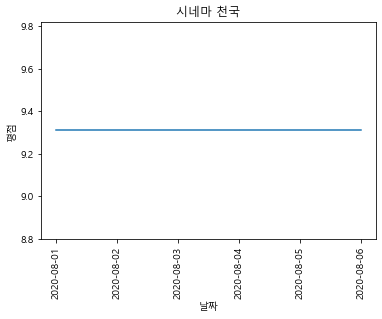

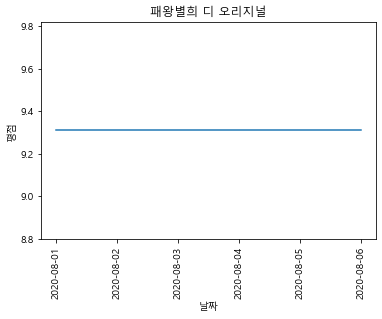

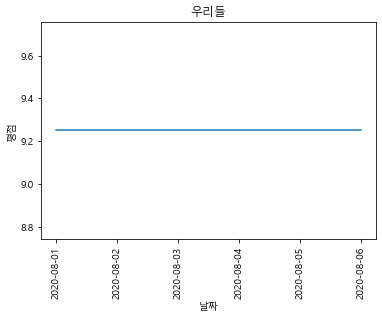

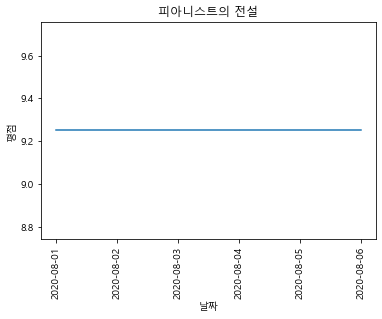

In [138]:
"""영화 하나당 1개의 그래프 그리기"""
for name in name_ranking_list:
    df = movie_df2[movie_df2["영화명"]==name]
    plt.figure()
    plt.title(name)
    plt.xticks(rotation=90)
    sns.lineplot("날짜","평점",data=df)